<a href="https://colab.research.google.com/github/sabamontazeri/machine-learning-course/blob/main/Abbaszade_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##install required libraries
!pip install scikeras
!pip uninstall tensorflow
!pip install tensorflow==2.12.0
!pip install scikit-learn==1.3.1
!pip install pygad

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.15.0
  Using cached tensorflow-2.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (585.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 49.2 MB/s eta 0:00:00
  Atte

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 27.2 MB/s eta 0:00:00


In [1]:
# @title make a dataset
##import makeblobs to generate data
from sklearn.datasets import make_blobs
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style

style.use("fivethirtyeight")

X,y = make_blobs(n_samples = 1350
                ,n_features = 8)
Dataset=pd.DataFrame(X,columns=["First feature","second feature","third feature","fourth feature","fifth feature","sixth feature","seventh feature","eightth feature"])
Dataset.head()

,First feature,second feature,third feature,fourth feature,fifth feature,sixth feature,seventh feature,eightth feature
0,4.605881,9.803248,6.121083,1.279592,3.761443,-10.047579,-7.439857,-1.649995
1,5.556106,10.188103,-5.354077,0.810863,4.936433,5.393378,7.328686,-6.784973
2,0.105345,-5.625839,4.611594,5.812404,-6.333058,-7.827851,3.038401,6.316551
3,4.037304,8.195893,7.695585,1.143282,2.432258,-7.894482,-7.674463,-3.150010
4,4.006808,7.092589,8.428358,1.319113,4.042680,-9.276726,-7.558737,-3.025375


### Preprocessing data###

In [3]:
# @title ####**Deleteing outliers by Z score**
##Deleting outliers by use of z score
from scipy import stats
import numpy as np
Zscores = Dataset.select_dtypes(include='number').apply(stats.zscore)
z = np.abs(stats.zscore(Dataset))
import numpy as np
##the threshold of 3 percent for deleting skewness
threshold_z = 3

outlier_indices = np.where(z > threshold_z)[0]
outlier_indices=outlier_indices.tolist()
outlier_indices=list(set(outlier_indices))

Data=Dataset.drop(outlier_indices)


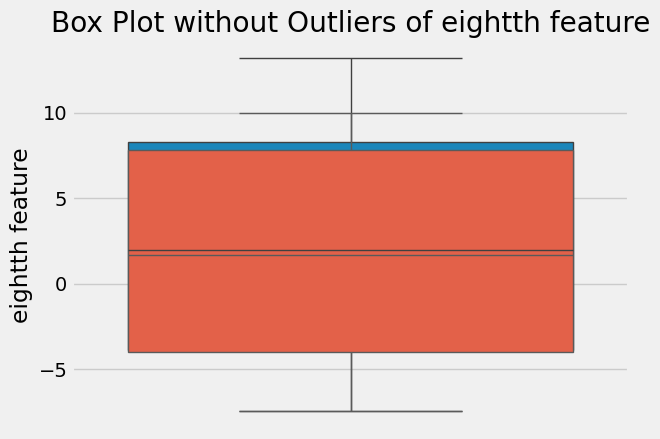

In [28]:
# @title ####**Deleteing outliers by box plot**
import seaborn as sns
#sns.boxplot(Data['Failure load(KN)'])
def removal_box_plot(Dataset, column, threshold):
    sns.boxplot(Dataset[column])
    plt.title(f'Original Box Plot of {column}')


    removed_outliers = Dataset[Dataset[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')

    return removed_outliers


threshold_value = 10
no_outliers = removal_box_plot(Dataset ,'eightth feature', threshold_value)
## we conclude that the dataset didnt have any outliers

In [4]:
# @title ####**Scaling data**
from sklearn.preprocessing import MinMaxScaler
##MinMax scaler is enough.Cause blobs are distributed in gausian manner
Scaler=MinMaxScaler()
Data=Scaler.fit_transform(Data)
Dataset=pd.DataFrame(Data,columns=["First feature","second feature","third feature","fourth feature","fifth feature","sixth feature","seventh feature","eightth feature"])

In [5]:
# @title ####**Spliting data**
from sklearn.model_selection import train_test_split
X=Dataset.drop("eightth feature",axis=1)
y=Dataset["eightth feature"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42,shuffle=True)

###Training Neural network###

In [6]:
# @title training neural network
import keras
from keras import layers
import tensorflow as tf
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import os
import random
import numpy as np
from tensorflow.keras import initializers
##Global initializer
initializer = tf.keras.initializers.GlorotUniform(seed=10)
seed_value = 10
#1. Set `PYTHONHASHSEED` environment variable at a fixed value
os.environ['PYTHONHASHSEED'] = str(seed_value)
#2. Set `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)
#3. Set `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

###make a build model for a keras regressor
##Optimizer is choosed adam but Nadam is also good for this purpose
def build_model(n_hidden=4, n_neurons=50, learning_rate=   0.005, input_shape=[7],activation_1="tanh",optimizer="adam"):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation=activation_1,kernel_initializer=initializer))
        model.add(keras.layers.Dropout(0.05))
    model.add(keras.layers.Dense(1))
    #optimizer = keras.optimizers.SGD(learning_rate=learning_rate,momentum=0.3)
    model.compile(loss="mse", optimizer=optimizer)
    return model
model=KerasRegressor(build_model)
history=model.fit(X_train, y_train ,epochs=300,validation_data=(X_test,y_test),callbacks=[ keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)] )
##Predict the data by choosen model
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)



<ipython-input-6-3681bda10e52>:33: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasRegressor(build_model)


Epoch 1/300
36/36 [==============================] - 2s 9ms/step - loss: 0.0654 - val_loss: 0.0094
Epoch 2/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0154 - val_loss: 0.0048
Epoch 3/300
36/36 [==============================] - 0s 3ms/step - loss: 0.0108 - val_loss: 0.0041
Epoch 4/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 0.0042
Epoch 5/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0086 - val_loss: 0.0043
Epoch 6/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.0038
Epoch 7/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.0040
Epoch 8/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0066 - val_loss: 0.0036
Epoch 9/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0065 - val_loss: 0.0039
Epoch 10/300
36/36 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.0045
Epoch 11/

In [11]:
# @title performance of ANN
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train,y_pred_train))
print(mean_squared_error(y_test,y_pred_test))

0.003931561409088644
0.004136366646380432


Train: 0.006, Test: 0.006


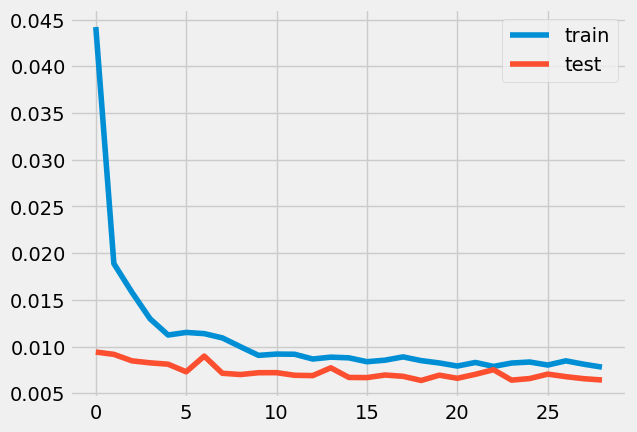

In [28]:
#@title monitor errors for choosing epochs
## to prevent overfitting
##we should monitor the error for earlystopping patience
train_acc = model.model.evaluate(X_train, y_train, verbose=0)
test_acc = model.model.evaluate(X_test ,y_test, verbose=0)
print('Train: %.3f, Test: %.3f'
% (train_acc, test_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [37]:
#@title define params for grid search
##in order to fine tune
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [ 2, 3,4],
    "n_neurons":[10,20,30,40],
    "activation_1" : ["relu","tanh"],

}
##we can use randomsearchcv instead of gridsearch
#rnd_search_cv = RandomizedSearchCV(model, param_distribs, n_iter=10, cv=3, )
#rnd_search_cv.fit(Xtrain, ytrain, epochs=100)
gs=GridSearchCV(estimator=model, param_grid=param_distribs, cv=3)
# now fit the dataset to the GridSearchCV object.
gs = gs.fit(X_train, y_train)

12/12 [==============================] - 0s 2ms/step - loss: 0.1022
Train on 765 samples
765/765 [==============================] - 0s 556us/sample - loss: 0.2541


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 764 samples
764/764 [==============================] - 0s 649us/sample - loss: 0.1016
Train on 765 samples
765/765 [==============================] - 1s 752us/sample - loss: 0.1085
Train on 765 samples
765/765 [==============================] - 1s 862us/sample - loss: 0.1011
Train on 764 samples
764/764 [==============================] - 1s 1ms/sample - loss: 0.1073
Train on 765 samples
765/765 [==============================] - 1s 1ms/sample - loss: 0.1232
Train on 765 samples
765/765 [==============================] - 1s 2ms/sample - loss: 0.0952
Train on 764 samples
764/764 [==============================] - 1s 1ms/sample - loss: 0.3136
Train on 765 samples
765/765 [==============================] - 1s 2ms/sample - loss: 0.1706
Train on 765 samples
765/765 [==============================] - 1s 2ms/sample - loss: 0.5223
Train on 764 samples
764/764 [==============================] - 4s 5ms/sample - loss: 0.2046
Train on 765 samples
765/765 [==============================] - 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/loc

Train on 1147 samples
1147/1147 [==============================] - 3s 3ms/sample - loss: 0.0601


In [39]:
# @title show best params
print(gs.best_params_)

{'activation_1': 'tanh', 'n_hidden': 4, 'n_neurons': 40}
{'activation_1': 'tanh', 'n_hidden': 4, 'n_neurons': 40}


###Optimizing by Genetics Algorithm###

In [23]:
!pip install pygad
import pygad
import tensorflow
from tensorflow.keras import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
# define the layers
x_in = Input(shape=(7,))
x1 = Dense(30)(x_in)
x2=Dense(40)(x1)
x_out = Dense(1)(x2)

# define the model
model = Model(inputs=x_in, outputs=x_out)


In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_5 (Dense)             (None, 40)                320       
                                                                 
 dense_6 (Dense)             (None, 40)                1640      
                                                                 
 dense_7 (Dense)             (None, 40)                1640      
                                                                 
 dense_8 (Dense)             (None, 40)                1640      
                                                                 
 dense_9 (Dense)             (None, 1)                 41        
                                                                 
Total params: 5,281
Trainable params: 5,281
Non-trainable par

In [13]:
##Import a genetic algorithm base algorithm
import pygad.kerasga
keras_ga=pygad.kerasga.KerasGA(model=model,num_solutions=10)

43/43 [==============================] - 0s 1ms/step
Generation = 1
Fitness    = 3.3350942709071885
43/43 [==============================] - 0s 2ms/step
Generation = 2
Fitness    = 3.3350942709071885
43/43 [==============================] - 0s 1ms/step
Generation = 3
Fitness    = 3.3350942709071885
43/43 [==============================] - 0s 1ms/step
Generation = 4
Fitness    = 3.3350942709071885
43/43 [==============================] - 0s 2ms/step
Generation = 5
Fitness    = 3.3350942709071885
43/43 [==============================] - 0s 1ms/step
Generation = 6
Fitness    = 3.3350942709071885
43/43 [==============================] - 0s 1ms/step
Generation = 7
Fitness    = 3.3350942709071885
43/43 [==============================] - 0s 1ms/step
Generation = 8
Fitness    = 3.3350942709071885
43/43 [==============================] - 0s 1ms/step
Generation = 9
Fitness    = 3.3350942709071885
43/43 [==============================] - 0s 1ms/step
Generation = 10
Fitness    = 3.3350942709071885

Generation = 80
Fitness    = 3.3976011259167214


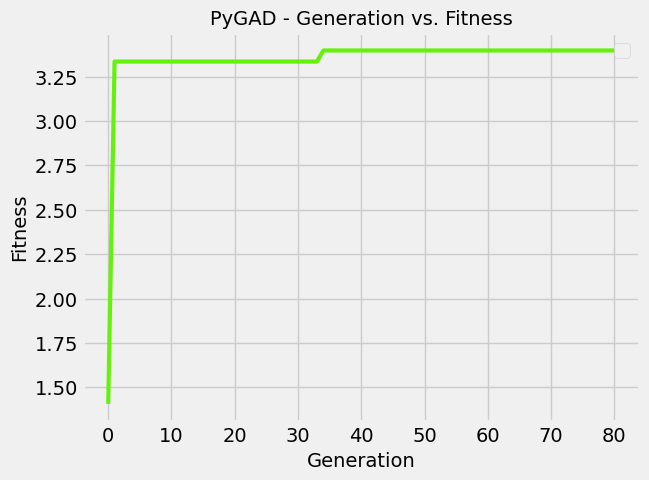

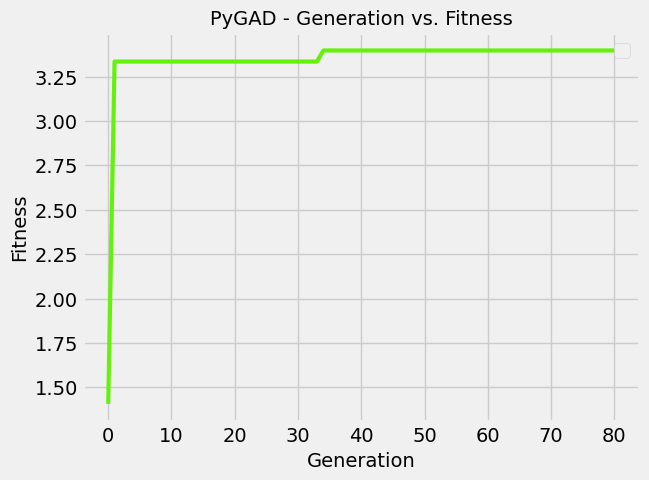

In [25]:
##Generate a fitness function that is a objective function
def fitness_func(ga_instance,solution,solution_idx):
  global X,y,keras_ga,model
  model_weights_matrix=pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
  model.set_weights(weights=model_weights_matrix)
  predictions=model.predict(X)
  mae=tensorflow.keras.losses.MeanAbsoluteError()
  error=mae(y,predictions).numpy()
  solution_fitness=1/(error+0.000001)
  return solution_fitness
fitness_function = fitness_func
last_fitness=0
##On generation function is for calculating new fitness functions and the changes of fitness function
def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

##import a ga instance including generations, parents(doing crossover,....)
ga_instance=pygad.GA(num_generations= 80,
                     num_parents_mating=2,
                     fitness_func=fitness_func,
                     initial_population=keras_ga.population_weights,
                     on_generation=on_generation,
                     suppress_warnings=True)
ga_instance.run()

ga_instance.plot_fitness()



In [26]:
#@title mean squared error of the model optimized by GA
from sklearn.metrics import mean_squared_error
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
best_solution_weights=pygad.kerasga.model_weights_as_matrix(model=model,weights_vector=solution)
model.set_weights(best_solution_weights)
prediction=model.predict(X_train)
print(mean_squared_error(y_train,prediction))
##برای الگوریتم ژنتیک نیاز به مشخص کردن درصد درآمیزش و جهش و ... است که به دلیل کمبود وقت انجام نشد و جواب بهینه نیست

36/36 [==============================] - 0s 1ms/step
0.04291535178695617
